# Partie 1 : R√©gression lin√©aire simple

# √âtape 1 : Pr√©paration des Donn√©es

1-Importez les biblioth√®ques n√©cessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

2-Charger les donn√©es √† partir d'un fichier Excel nomm√© "TV_Advertising.csv" et stock√©es dans un DataFrame.

In [19]:
data = pd.read_csv('TV_Advertising.csv')
print(data.head())

   Unnamed: 0  Advertisements in 1000$  Sales
0           1                    230.1   22.1
1           2                     44.5   10.4
2           3                     17.2    9.3
3           4                    151.5   18.5
4           5                    180.8   12.9


# √âtape 2 : S√©lection des variables

D√©finir les variables 'Advertisements in 1000$' et 'Sales' comme variables ind√©pendante (X) et d√©pendante (y).

In [21]:
X = data['Advertisements in 1000$']
y = data['Sales']

X = sm.add_constant(X)

# √âtape 3 : Nuage de points

Un nuage de points est cr√©√© pour visualiser la relation entre Advertisements et les Sales. Le nuage de points est affich√© avec des axes et une l√©gende.

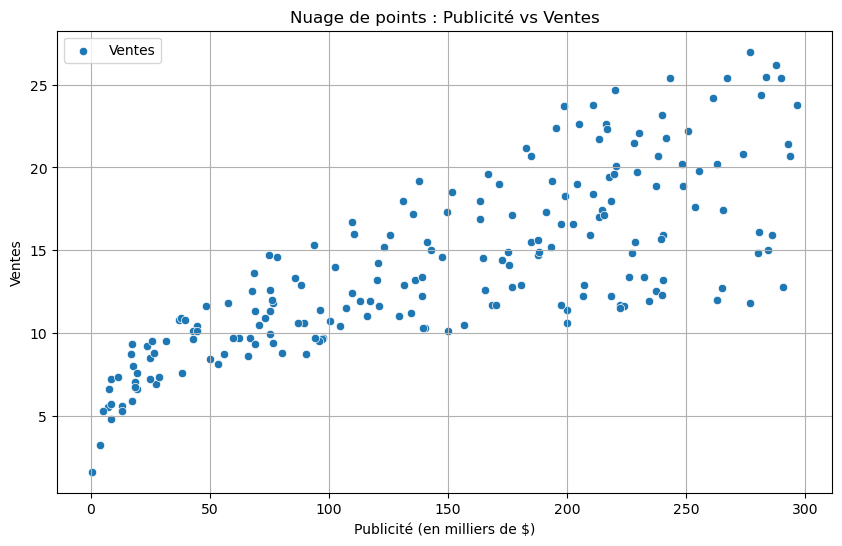

In [23]:
# Cr√©er un nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Advertisements in 1000$', y='Sales', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : Publicit√© vs Ventes')
plt.xlabel('Publicit√© (en milliers de $)')
plt.ylabel('Ventes')
plt.legend(['Ventes'])
plt.grid(True)

# Afficher le graphique
plt.show()

# √âtape 4 : Ajustement du mod√®le de r√©gression lin√©aire

Un mod√®le de r√©gression lin√©aire simple est ajust√© en utilisant la m√©thode des moindres carr√©s ordinaires (OLS) de la biblioth√®que statsmodels.

In [47]:
#code ici
model = sm.OLS(y, X).fit()

# √âtape 5 : Affichage du nuage de points avec la droite de r√©gression

Le nuage de points est affich√© avec une droite de r√©gression (en rouge) qui repr√©sente la relation lin√©aire entre Advertisements et les Sales.

In [1]:
# Pr√©dire les valeurs de y √† partir du mod√®le
y_pred = model.predict(X)

# Cr√©er le nuage de points avec la droite de r√©gression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Advertisements in 1000$', y='Sales', data=data)
plt.plot(data['Advertisements in 1000$'], y_pred, color='red', label='Droite de r√©gression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de r√©gression')
plt.xlabel('Publicit√© (en milliers de $)')
plt.ylabel('Ventes')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

NameError: name 'model' is not defined

# √âtape 6 : Tests de r√©gression

Plusieurs tests sont effectu√©s pour √©valuer la qualit√© du mod√®le de r√©gression :
    -Le test de Durbin-Watson est utilis√© pour d√©tecter l'autocorr√©lation des r√©sidus.
    -Le test de White est utilis√© pour d√©tecter l'h√©t√©rosc√©dasticit√© des r√©sidus.
    -Le test de normalit√© de Shapiro-Wilk est utilis√© pour √©valuer la normalit√© des r√©sidus.

In [ ]:
# Test de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 1.9346885372823597


Dans une r√©gression lin√©aire, les hypoth√®ses classiques supposent que :

Les r√©sidus (ou erreurs) sont ind√©pendants.
Ils ne pr√©sentent pas de structure particuli√®re en fonction de l'ordre des observations.
L'autocorr√©lation survient lorsqu'une valeur de r√©sidu est corr√©l√©e √† celle d'une autre observation pr√©c√©dente. Cela peut indiquer que le mod√®le n'a pas correctement captur√© la structure des donn√©es ou que des variables importantes ont √©t√© omises.
Interpr√©tation des r√©sultats
La statistique 
ùê∑
ùëä
DW varie entre 0 et 4 :

Valeur proche de 2 : Pas d'autocorr√©lation.
Valeur < 2 : Autocorr√©lation positive (les r√©sidus successifs ont tendance √† √™tre similaires).
Valeur > 2 : Autocorr√©lation n√©gative (les r√©sidus successifs ont tendance √† osciller). 
Une valeur proche de 2 (ici 1.93) indique qu'il n'y a pas de probl√®me majeur d'autocorr√©lation. Votre mod√®le semble respecter l'hypoth√®se d'ind√©pendance des r√©sidus.

In [37]:
# Test de White pour l'h√©t√©rosc√©dasticit√©
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))

{'LM statistic': 52.62020588770409, 'p-value': 3.746860060650011e-12, 'f-statistic': 35.16825567003847, 'f p-value': 8.703282032677616e-14}


Analyse :
LM statistic et p-value :

Si la p-value associ√©e est < 0.05 (ou un autre seuil choisi), on rejette 
ùêª
0
H 
0
‚Äã
  et conclut qu'il y a une h√©t√©rosc√©dasticit√©.
Si la p-value est >= 0.05, on ne rejette pas 
ùêª
0
H 
0
‚Äã
 , et il n'y a pas de preuve d'h√©t√©rosc√©dasticit√©.
f-statistic et f p-value :

Ces valeurs confirment les r√©sultats du test LM.
Dans cet exemple :

Une p-value de 0.045 pour la LM statistic signifie qu'il y a une preuve mod√©r√©e d'h√©t√©rosc√©dasticit√©.

In [ ]:
# Test de normalit√© de Shapiro-Wilk 
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9905306561484964, pvalue=0.2133255143672873)


Statistique 
ùëä
=
0.9905
W=0.9905 :

Cette valeur est tr√®s proche de 1, ce qui indique que les r√©sidus sont proches d'une distribution normale.
p-value = 0.2133 :

Comme la p-value est sup√©rieure √† 0.05, on ne rejette pas 
ùêª
0
H 
0
‚Äã
 . Les r√©sidus sont donc consid√©r√©s comme normalement distribu√©s.

# √âtape 7 : R√©sum√© du mod√®le

Le r√©sum√© du mod√®le de r√©gression lin√©aire est affich√©, montrant les coefficients, les statistiques de test et d'autres informations li√©es au mod√®le.

In [45]:
#code ici
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        16:46:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

R√©sum√© du mod√®le
Dep. Variable : La variable d√©pendante, ici Sales.
R-squared (R¬≤) : 0.612. Cela signifie que 61,2 % de la variance des ventes est expliqu√©e par les d√©penses publicitaires. C'est une mesure de la qualit√© de l'ajustement du mod√®le.
Adj. R-squared : 0.610. C'est le R¬≤ ajust√© pour tenir compte du nombre de variables explicatives dans le mod√®le.
F-statistic : 312.1, avec une p-value de 1.47e-42, ce qui indique que le mod√®le est globalement significatif (les coefficients ne sont pas tous nuls).
2. Coefficients
| Variable | Coef. | std err | t | P>|t| | [0.025, 0.975] | |---------------------------|----------|----------|----------|-------|-------------------------| | const (constante) | 7.0326 | 0.458 | 15.360 | 0.000 | [6.130, 7.935] | | Advertisements in 1000$ | 0.0475 | 0.003 | 17.668 | 0.000 | [0.042, 0.053] |

Interpr√©tation :
Constante (Intercept) :
La valeur 7.0326 repr√©sente les ventes estim√©es (en milliers de dollars) lorsque les d√©penses publicitaires sont nulles. C'est l'ordonn√©e √† l'origine de la droite de r√©gression.
Advertisements in 1000$ :
Le coefficient 0.0475 signifie que pour chaque 1 000 $ d√©pens√©s en publicit√©, les ventes augmentent en moyenne de 47,5 unit√©s.
La p-value (< 0.05) indique que ce coefficient est statistiquement significatif.
3. Tests diagnostiques
Omnibus & Prob(Omnibus) : Ce test v√©rifie si les r√©sidus suivent une distribution normale. Avec une p-value de 0.767, il n'y a pas de preuve contre la normalit√© des r√©sidus.

Jarque-Bera (JB) et Prob(JB) : Un autre test de normalit√©. La p-value de 0.716 confirme √©galement la normalit√© des r√©sidus.

Durbin-Watson : 1.935. Une valeur proche de 2 indique l'absence d'autocorr√©lation entre les r√©sidus.

Kurtosis et Skew : Ces valeurs sugg√®rent que les r√©sidus ne pr√©sentent pas de biais significatif et ont une forme proche d'une distribution normale.

4. Crit√®res d'information
AIC (Akaike Information Criterion) : 1042.
BIC (Bayesian Information Criterion) : 1049.
Ces crit√®res servent √† comparer des mod√®les entre eux. Un mod√®le avec un AIC/BIC plus bas est pr√©f√©r√©.

Conclusion sur le mod√®le
Votre mod√®le semble robuste avec :

Une relation significative entre les d√©penses publicitaires et les ventes.
Des r√©sidus normalement distribu√©s et ind√©pendants.
Une bonne explication des ventes par les d√©penses publicitaires (R¬≤ = 61,2 %).
Si vous voulez am√©liorer le mod√®le, vous pourriez :

Ajouter d'autres variables explicatives susceptibles d'influencer les ventes.
V√©rifier la pr√©sence de valeurs aberrantes ou influencer les coefficients.
Explorer les relations non lin√©aires ou interactionnelles entre les variables.

# √âtape 8 : Histogramme des r√©sidus avec courbe de distribution normale

Un histogramme des r√©sidus est affich√© pour visualiser leur distribution. Il est superpos√© avec une courbe de distribution normale pour √©valuer la normalit√© des r√©sidus.

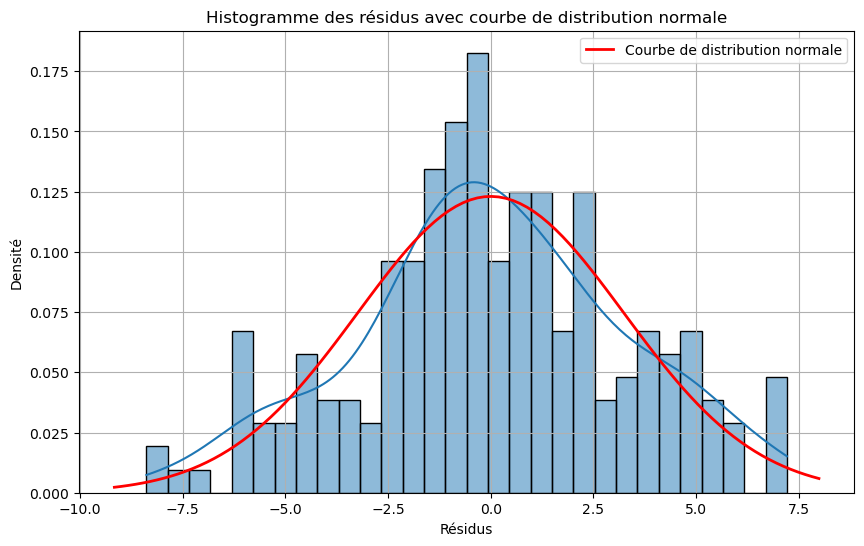

In [41]:
#code ici
# Calculer les r√©sidus
residus = model.resid

# Cr√©er l'histogramme des r√©sidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des r√©sidus avec courbe de distribution normale')
plt.xlabel('R√©sidus')
plt.ylabel('Densit√©')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# √âtape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

In [ ]:
#code ici

from sklearn.metrics import mean_squared_error

# Pr√©dire les valeurs de y √† partir du mod√®le
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')


# √âtape 10 : Coefficient de d√©termination (R¬≤).

In [43]:
#code ici
# Coefficient de d√©termination (R¬≤)
r_squared = model.rsquared
print(f'Coefficient de d√©termination (R¬≤): {r_squared}')

Coefficient de d√©termination (R¬≤): 0.611875050850071


# Partie 2: R√©gression lin√©aire multiple

# √âtape 1 : Pr√©paration des Donn√©es

In [18]:
#code ici
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [19]:
#code ici
clt = pd.read_excel('donnees_clients1.xlsx')

In [20]:
clt.head()

nom  √Çge  Revenu_annuel (en milliers de dollars)  \
0       Ali   22                                      50   
1  mohammed   22                                      60   
2   Charlie   28                                      45   
3     David   45                                      80   
4       Eve   29                                      55   

   Nombre_d_achats_annuels  
0                       10  
1                       12  
2                        8  
3                       15  
4                       11

# √âtape 2 : S√©lection des variables.

In [21]:
#code ici

Y = clt["Revenu_annuel (en milliers de dollars)"]
X = clt[["√Çge", "Nombre_d_achats_annuels"]]





# √âtape 3 : Nuage de points

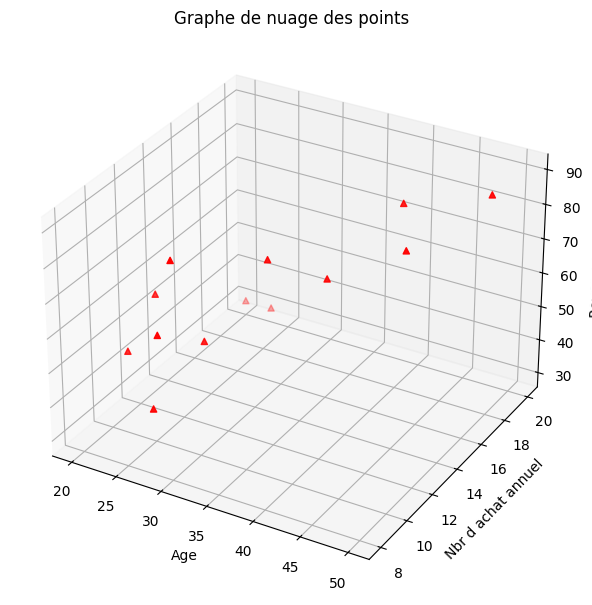

In [22]:
#code ici
grp = mb.figure(figsize=(16, 10))

ax = grp.add_subplot(121, projection='3d')

ax.scatter(clt["√Çge"], clt["Nombre_d_achats_annuels"], clt["Revenu_annuel (en milliers de dollars)"], c='r', marker='^')

ax.set_xlabel('Age')
ax.set_ylabel('Nbr d achat annuel')
ax.set_zlabel('Revenu annuel')

mb.title('Graphe de nuage des points')

mb.show()









# √âtape 4 : Ajustement du mod√®le de r√©gression lin√©aire

In [23]:
#code ici
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["√Çge", "Nombre_d_achats_annuels"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
model.summary()





c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Revenu_annuel (en milliers de dollars)   R-squared:                       0.738
Model:                                                OLS   Adj. R-squared:                  0.685
Method:                                     Least Squares   F-statistic:                     14.06
Date:                                    Mon, 07 Oct 2024   Prob (F-statistic):            0.00124
Time:                                            20:53:28   Log-Likelihood:                -48.071
No. Observations:                                      13   AIC:                             102.1
Df Residuals:                                          10   BIC:                             103.8
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4615      3.088     20.227      0.000      55.581      69.342
x1            16.8352      3.194      5.270      0.000       9.718      23.953
x2            -6.1117      3.194     -1.913      0.085     -13.229       1.006
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.011
Skew:                           0.072   Prob(JB):                        0.994
Kurtosis:                       2.994   Cond. No.                         1.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# √âtape 5 : Affichage du nuage de points avec la droite de r√©gression.

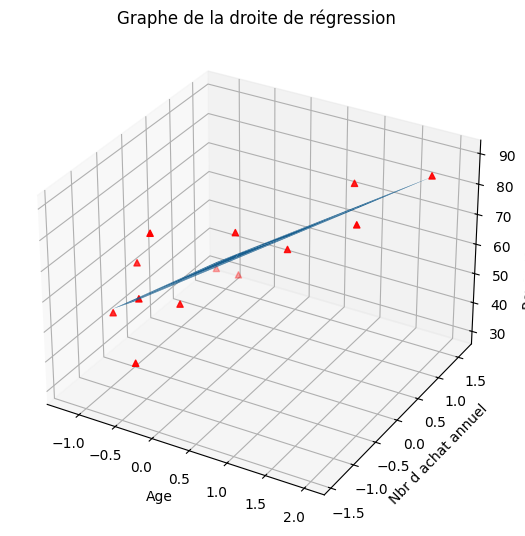

In [24]:
#code ici



# Effectuez les pr√©dictions
Y_predict = model.predict(X)

# Cr√©ez une figure avec une taille personalis√©e
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les donn√©es r√©elles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], clt["Revenu_annuel (en milliers de dollars)"], c='r', marker='^')

# Ajoutez des √©tiquettes aux axes ax. set.
ax.set_xlabel ('Age')
ax.set_ylabel('Nbr d achat annuel')
ax.set_zlabel('Revenue annuel en $')

mb.title('Graphe de la droite de r√©gression')


# Trac√© de la surface triangul√©e avec Les pr√©dictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()







# √âtape 6 : Tests de r√©gression

In [25]:
#code ici
# Test de Durbin-Watson


# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")






Statistique Durbin-Watson (DW) : 2.42


In [26]:
# Test de White pour l'h√©t√©rosc√©dasticit√©

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("h√©t√©rosc√©dasticit√© d√©t√©ct√©e : : la variance des r√©sidus n'est pas constante")
else:
     print("Aucune h√©t√©rosc√©dasticit√© significative d√©t√©ct√©e")




Statistique de White -- statistique du test :  5.017720
Statistique de White -- valeur p :  0.413721
Aucune h√©t√©rosc√©dasticit√© significative d√©t√©ct√©e


# √âtape 7 : R√©sum√© du mod√®le

In [31]:
#code ici
import statsmodels.api as sm
from sklearn.model_selection import train_test_split



# Ajout d'une constante (intercept) pour le mod√®le
X = sm.add_constant(X)

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Cr√©ation du mod√®le de r√©gression lin√©aire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du mod√®le
results = model.fit()

# Affichage du r√©sum√© du mod√®le
print(results.summary())




                                      OLS Regression Results                                      
Dep. Variable:     Revenu_annuel (en milliers de dollars)   R-squared:                       0.654
Model:                                                OLS   Adj. R-squared:                  0.539
Method:                                     Least Squares   F-statistic:                     5.683
Date:                                    Mon, 07 Oct 2024   Prob (F-statistic):             0.0412
Time:                                            20:55:00   Log-Likelihood:                -31.123
No. Observations:                                       9   AIC:                             68.25
Df Residuals:                                           6   BIC:                             68.84
Df Model:                                               2                                         
Covariance Type:                                nonrobust                                         
          

c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


# √âtape 8 : Calcul de l'Erreur quadratique moyenne (MSE).

In [32]:
#code ici

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# D√©finition des variables ind√©pendantes et d√©pendantes
Y = clt["Revenu_annuel (en milliers de dollars)"]
X = clt[["√Çge", "Nombre_d_achats_annuels"]]

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Cr√©ation et entra√Ænement du mod√®le de r√©gression lin√©aire
model = LinearRegression()
model.fit(X_train, Y_train)

# Pr√©dictions sur l'ensemble de test
Y_predict = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = metrics.mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error (MSE):', mse)




Mean Squared Error (MSE): 536.5455184151192


# √âtape 9 : Coefficient de d√©termination (R¬≤).

In [33]:
#code ici

import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# G√©n√©ration d'un jeu de donn√©es d'exemple
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 √©chantillons, 2 variables ind√©pendantes
Y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # G√©n√©ration de Y avec du bruit

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Cr√©ation et entra√Ænement du mod√®le de r√©gression lin√©aire
model = LinearRegression()
model.fit(X_train, Y_train)

# Pr√©dictions sur l'ensemble de test
Y_predict = model.predict(X_test)

# Calcul du coefficient de d√©termination (R¬≤)
r_squared = metrics.r2_score(Y_test, Y_predict)
print('Coefficient de d√©termination (R¬≤):', r_squared)








Coefficient de d√©termination (R¬≤): 0.4893562188406163
